# Introdução a Machine Learning e Conceitos dos métodos de Classificação - 3

Aqui, queremos realizar uma previsão, se determinado projeto foi finalizado ou não com base em suas features

In [17]:
import pandas as pd

arq = "/content/drive/MyDrive/projetos/projetos-de-machine-learning/projects.csv"
dados = pd.read_csv(arq)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [18]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [19]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [20]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


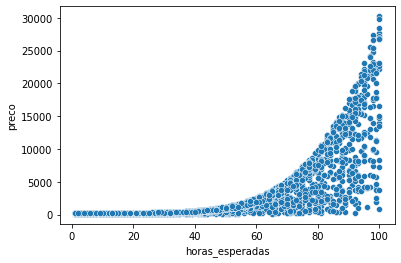

In [21]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)


Se tivessemos mais de duas Features (nesse projeto temos apenas duas), poderiamos escolher duas, e realizar essa plotagem, para visualização. Verificar qual mais teriam correlações mais fortes no resultado final.

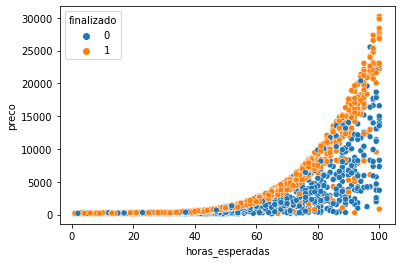

In [22]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)


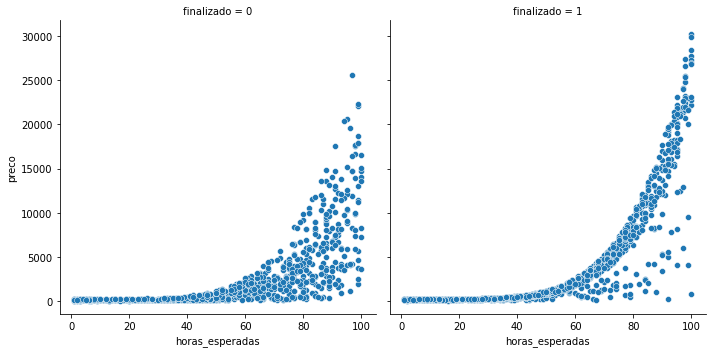

In [23]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

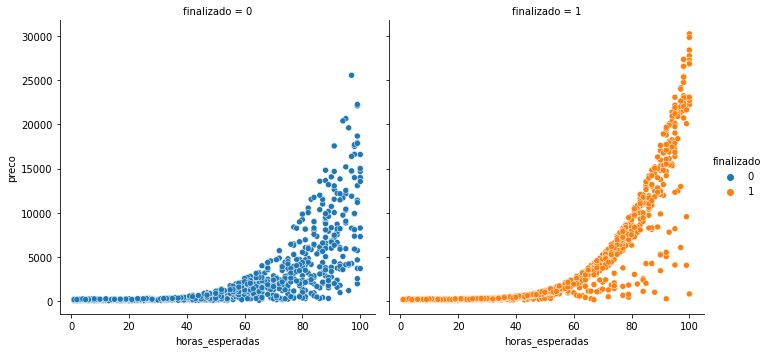

In [24]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [25]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
# np.random.seed(SEED) -> Utilzado para substituir o random_state do train_test_split e do LinearSVC
# ou seja, se utilizado, pode tirar o random_state separadamente que esse np ja está sendo aplicado
# para todos

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state = SEED, dual = False) # Necessário incluir esse dual = False, pois estava dando erro de iteração
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.93%


Criando um algoritmo de base para termos ideia se o nosso modelo está sendo melhor que ele ou não, se está tendo desempenho parecido

In [27]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base)*100
print("A acurácia do algoritmo de baseline foi %.2f" % acuracia, "%")

A acurácia do algoritmo de baseline foi 52.59 %


Nese caso percebemos que o modelo está sendo apenas um pouco melhor de que nosso algoritmo de base que apenas chutou 1 pra tudo, quanto ao target. Portanto é necessário melhorar o modelo !
______________________________________________________

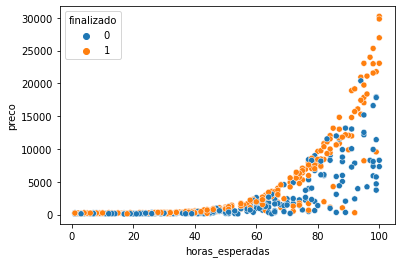

In [28]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x) 


In [29]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [30]:
pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [31]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)


In [32]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [33]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [34]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [35]:
Z = modelo.predict(pontos)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [36]:
Z = modelo.predict(pontos)
Z.shape

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [37]:
xx.shape

(100, 100)

In [38]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

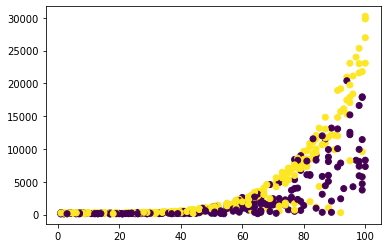

In [39]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)


Essa curva é a borda de decisão onde o algoritmo a partir dele define se é 0 ou 1, onde basicamente pra baixo define um valor e pra cima outro

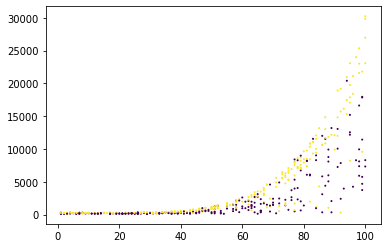

In [40]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


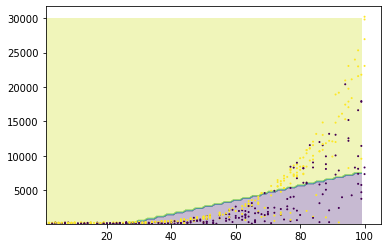

In [41]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
# np.random.seed(SEED) -> Utilzado para substituir o random_state do train_test_split e do LinearSVC
# ou seja, se utilizado, pode tirar o random_state separadamente que esse np ja está sendo aplicado
# para todos

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(random_state = SEED, gamma = 'auto') # Necessário incluir esse dual = False, pois estava dando erro de iteração
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


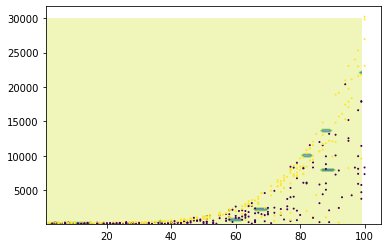

In [43]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


Por padrão esses algoritmos são muito sucetíveis a escala, então por padrão, quando tem menos valor, o algoritmo vai dar menos importância para eles. 
Por esse motivo é utilizado o pré-processamento do standardscaler

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
# np.random.seed(SEED) -> Utilzado para substituir o random_state do train_test_split e do LinearSVC
# ou seja, se utilizado, pode tirar o random_state separadamente que esse np ja está sendo aplicado
# para todos

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(random_state = SEED, gamma = 'auto') # Necessário incluir esse dual = False, pois estava dando erro de iteração
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [45]:
raw_treino_x.head()

,horas_esperadas,preco
549,16,139
1607,43,680
275,92,3772
298,60,1509
925,60,1158


In [46]:
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

Após termos redimensionado os eixos que representam as Features os dados de treino x que antes eram um data frame do pandas, agora se transformaram em um array, pois após termos aplicado o StandardScaler ele perde essa propriedade de dataframe do Pandas. Portanto, agora teremos que ajustar no código abaixo para gerar os eixos

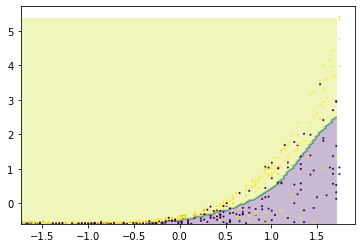

In [47]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


Por mais que o LinearSVC teve uma boa taxa, agora sim temos um algoritmo bem melhor, pois ela aprendeu a curva que vimos anteriormente, onde ele parece definir o comportamento da decisão do nosso target.